<h1> Stroke Predictions </h1>

1. Context

* According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

2. Data Collection
* Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data

<h3> Import Libraries </h3>

In [103]:
import warnings
warnings.filterwarnings('ignore')

# standard libraries
import pandas as pd

# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<h4> Import the csv into a Pandas DataFrame (df) </h4>

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

<h4> Check dimensions of the data </h4>

In [3]:
df.shape

(5110, 12)

<h4> Top 5 rows </h4>

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h3> EDA </h3>

<h4> Check for duplicates </h4>

In [5]:
df.duplicated().sum()

0

<h4> Glimpse at data </h4>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<h4> Check target variable (stroke) distribution </h4>

<Axes: xlabel='stroke', ylabel='count'>

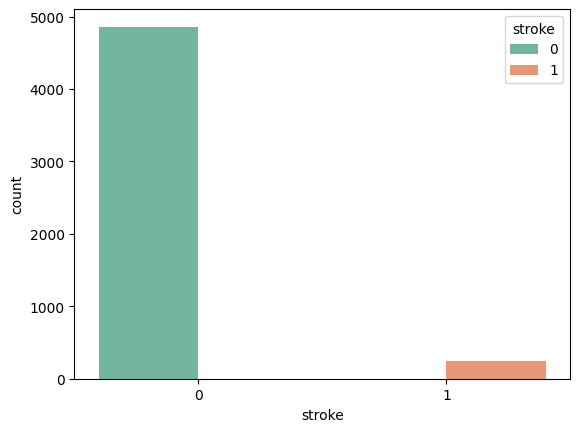

In [54]:
sns.countplot(x='stroke',
              data=df,
              hue='stroke',
              palette='Set2')

<h4> Discussion </h4>

* The data includes 5,110 individuals and 10 predictors for a stroke (1 or 0)
    * Will remove the ID variable
* There are 3 numeric variables: age, avg_glucose_level, and bmi
    * hypertension and heart_disease are both binary and will be treated as categorical   
* The target variable, stroke, is highly imbalanced
    * Traditionally with balanced data, accuracy is good measure, but in this case, \
      we are mostly interested in just identifying those who might have a stroke, so \
      we should use recall to measure how effective our model will be.
* BMI has around 4% of its data missing



<h4> Categorical Data Analysis </h4>

In [83]:
df['hypertension'] = df['hypertension'].astype(str)
df['heart_disease'] = df['heart_disease'].astype(str)

In [84]:
round(df.describe(exclude=['float', 'int64']), 0)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4
top,Female,0,0,Yes,Private,Urban,never smoked
freq,2994,4612,4834,3353,2925,2596,1892


<h5> Gender </h5>

<Axes: xlabel='gender', ylabel='Count'>

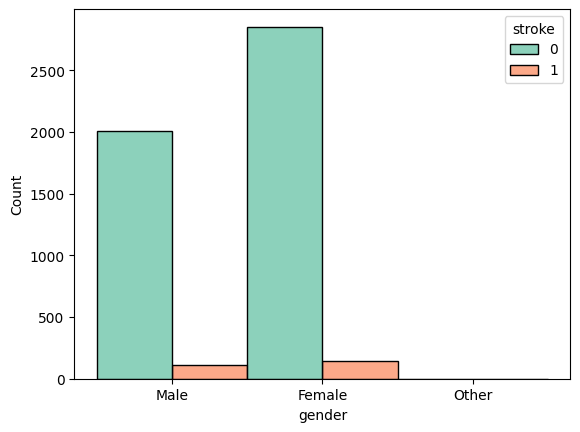

In [65]:
sns.histplot(binwidth=1,
             x='gender',
             hue='stroke',
             data=df,
             stat='count',
             multiple='dodge',
             palette='Set2')

<h5> Marriage </h5>

<Axes: xlabel='ever_married', ylabel='Count'>

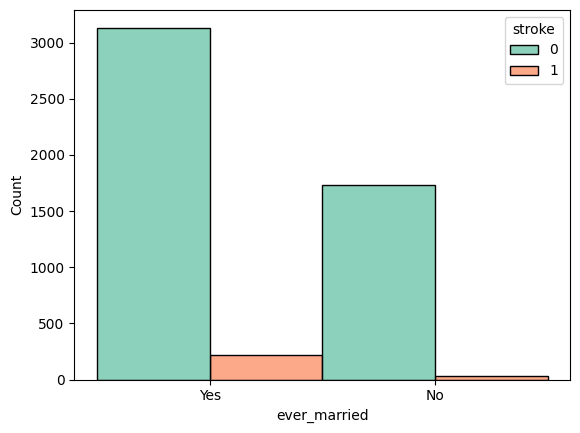

In [66]:
sns.histplot(binwidth=1,
             x='ever_married',
             hue='stroke',
             data=df,
             stat='count',
             multiple='dodge',
             palette='Set2')

<h5> Work Type </h5>

<Axes: xlabel='work_type', ylabel='Count'>

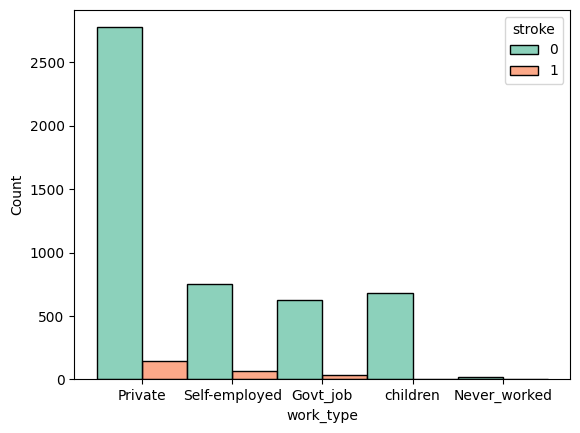

In [67]:
sns.histplot(binwidth=1,
             x='work_type',
             hue='stroke',
             data=df,
             stat='count',
             multiple='dodge',
             palette='Set2')

<h5> Residence Type </h5>

<Axes: xlabel='Residence_type', ylabel='Count'>

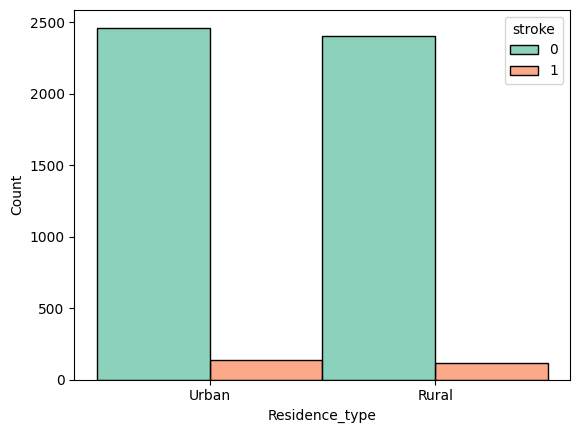

In [68]:
sns.histplot(binwidth=1,
             x='Residence_type',
             hue='stroke',
             data=df,
             stat='count',
             multiple='dodge',
             palette='Set2')

<h5> Smoking Status </h5>

<Axes: xlabel='smoking_status', ylabel='Count'>

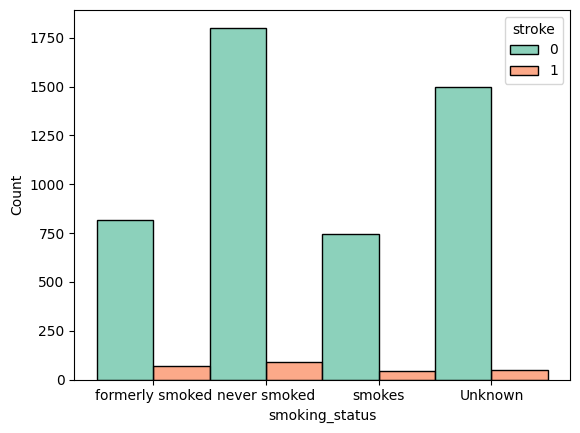

In [80]:
sns.histplot(binwidth=1,
             x='smoking_status',
             hue='stroke',
             data=df,
             stat='count',
             multiple='dodge',
             palette='Set2')

<h5> Hypertension </h5>

<Axes: xlabel='hypertension', ylabel='Count'>

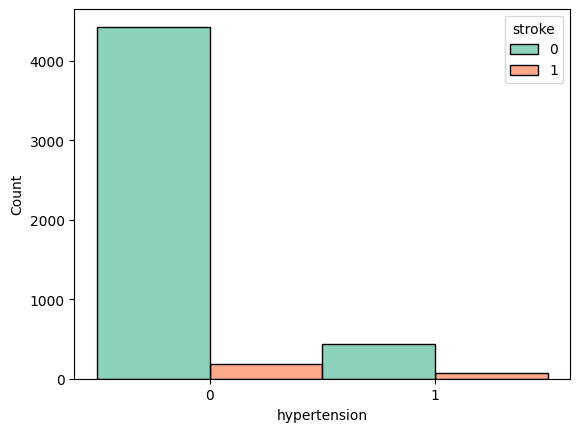

In [87]:
sns.histplot(binwidth=1,
             x='hypertension',
             hue='stroke',
             data=df,
             stat='count',
             multiple='dodge',
             palette='Set2')

<h5> Heart Disease </h5>

<Axes: xlabel='heart_disease', ylabel='Count'>

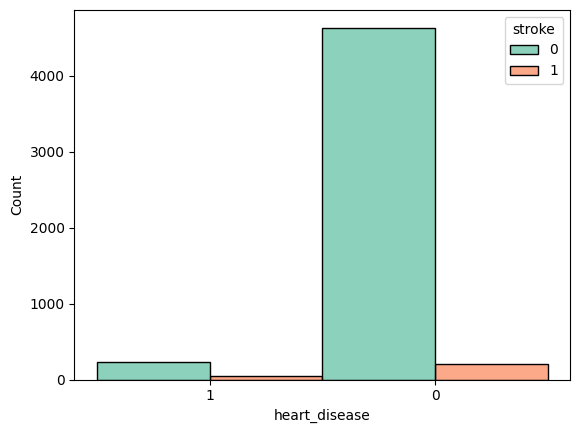

In [88]:
sns.histplot(binwidth=1,
             x='heart_disease',
             hue='stroke',
             data=df,
             stat='count',
             multiple='dodge',
             palette='Set2')

<h4> Numeric Variable Analysis </h4>

In [90]:
df.describe()

,id,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,106.147677,28.893237,0.048728
std,21161.721625,22.612647,45.283560,7.854067,0.215320
min,67.000000,0.080000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,271.740000,97.600000,1.000000


<h5> Age </h5>

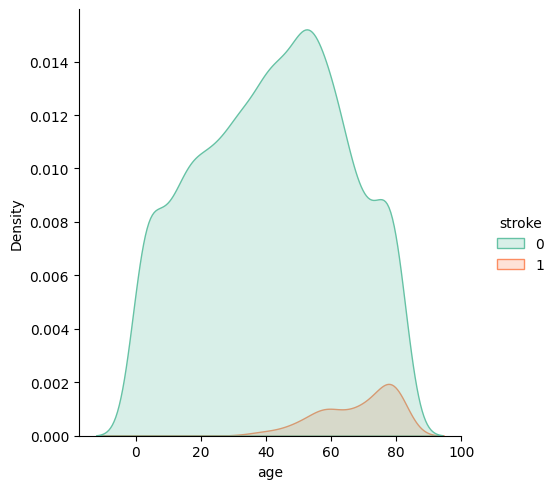

In [91]:
sns.displot(data=df,
            x='age',
            hue='stroke',
            kind='kde',
            fill=True,
            palette='Set2')

<h5> Average Glucose Level </h5>

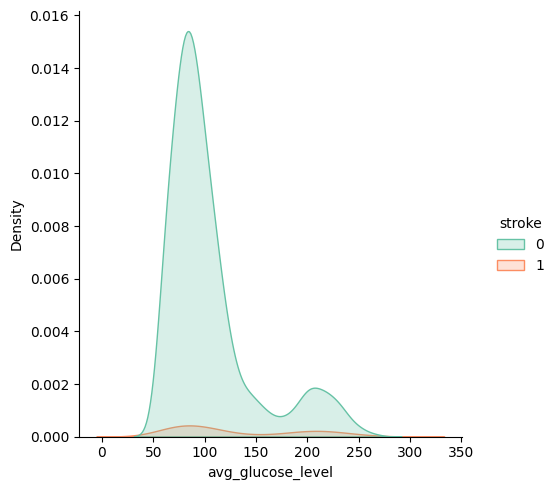

In [92]:
sns.displot(data=df,
            x='avg_glucose_level',
            hue='stroke',
            kind='kde',
            fill=True,
            palette='Set2')

<h5> BMI </h5>

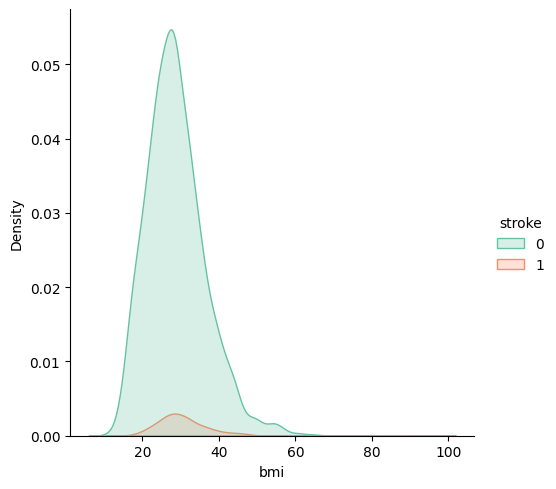

In [93]:
sns.displot(data=df,
            x='bmi',
            hue='stroke',
            kind='kde',
            fill=True,
            palette='Set2')

In [99]:
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform).drop('id', axis=1)
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,239,1,1
1,0,82,0,0,1,3,0,3588,418,2,1
2,1,101,0,1,1,2,0,2483,198,2,1
3,0,70,0,0,1,2,1,3385,217,3,1
4,0,100,1,0,1,3,0,3394,113,2,1


<h4> Correlation Plot </h4>

<Axes: >

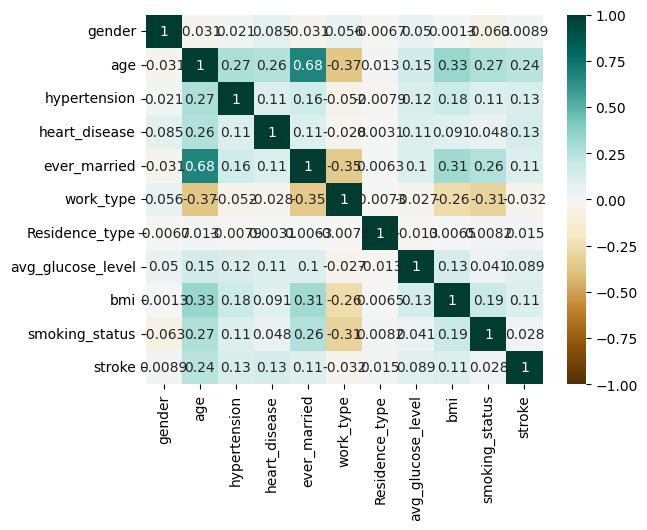

In [102]:
sns.heatmap(data=df_encoded.corr(),
            cmap='BrBG',
            vmin=-1,
            vmax=1,
            annot=True)

<h4> Discussion </h4>

* Upon observation, Age, Heart Disease, and Hypertension appear to be correlated with our target variable
